# Project 2: Prediction of Ames Housing Sale Price  


---
## Problem Statement 

This project examines a housing dataset from Ames, Iowa, USA. Ideally, the homeowners in Ames should be armed with data, such as the Ames housing dataset to maximise their property value, while buyers would make the best investment decision based on the available data when purchasing property. However, due to a lack of data, many homeowners overspend in trying to improve particular features of their home that do not translate to higher home value. Buyers may not get a bang for their buck when purchasing homes as they do not know which features (size, features, neighbourhood, etc) warrant a higher or lower home price. This could result in a financial loss for both homeowners and buyers. 

The Ames housing train dataset will be processed using linear regression models to find out which features in the dataset have a positive correlation to sale price. The goal of this project is to produce a model that can best predict sale prices based on the features in Ames housing test set. This model would provide homeowners with information on which parts of their home to improve to get a higher sale price. Buyers would also know which features are worth paying more for, enabling them to make better informed purchasing choices. 


---
## Executive Summary 

The Ames housing train dataset comprises information on 81 home features.  These features broadly refer to the size, condition and quality of the house, number of rooms, type of home, key features (garage, basement, fireplace, pool, etc), significant dates (year built, sold, remodelled) and the neighbourhood it is located in. (The data dictionary can be found here in this [link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data).) It also includes the sale price for each of the 2051 entries. The features are classified into numeric and categorical, and the latter can be subdivided into ordinal (quality assessments) and descriptive categories (neighbourhoods, etc).

To generate a good production model that can accurately predict sale prices of houses in Ames with an unseen dataset, I first conducted data cleaning and EDA on the train dataset, where I was able to gauge how each feature affected sale price. Following which, I conducted conducted features engineering by adding, dropping and tweaking features, as well as using one-hot encoding to convert the remaining categorical columns to numeric, so that modelling can take place. Subsequently, I used regularised models (Ridge and Lasso) to further narrow down to the best-performing features, i.e., the features will the highest coefficients for each model. After several iterations to pick the best combination of features that returned good r2 scores and RMSE, I ended up picking a list of 30 best-performing features to be included in the features matrix. I conducted Linear, Ridge, Lasso and Elastic Net regression modelling, before concluding that the Elastic Net regression produced a model that was the best at predicting sale prices. Lastly, I fit the final production model on the Ames housing dataset (which I processed in the same way as the Ames housing train set), to obtain the sale price predictions, which I submitted to the Kaggle competition.

As expected, the model showed that the square footage of the house affected the sale price most. Quality and condition of key features such as external areas, basement and kitchen also significantly affect the sale price. The ideal home type is also a single-storey house. I also found that generally, the younger the home, the higher the sale price and that Hillside homes commanded an additional premium. The most desirable neighbourhoods in Ames are Northridge Heights, Stone Brook and Northridge, due to their proximity to schools and amenities. The data also showed that fireplaces and brick exterior on homes also had a positive impact on sale price as Iowa experienced extremely frigid winters. Conversely, factors that would have a detrimental impact on sale price are having an unfinished home, a house having more than 3 bedrooms or the house type being a Townhouse. 

Accordingly, recommendations for homeowners to improve the value of their homes would be to make sure it is in a livable condition, improving the quality of features such as kitchen, basements and external areas, as well as installing fireplaces or even a brick exterior to improve liveability during wintertime.  Buyers should wanting to make good investments in the Ames housing market should purchase newly built, single-storey homes with 2 or 3 bedrooms, in the neighbourhoods of Northridge Heights, Stone Brooks or Northridge. Homes with fireplaces and brick exteriors would be an added bonus for the property's value.

---
## The project is split into the following notebooks
- <b>EDA and Cleaning</b> 
- [Preprocessing and Feature Engineering](./2_Preprocessing_and_Feature_Engineering.ipynb)
- [Model Benchmarks](./3_Model_Benchmarks.ipynb)
- [Model Tuning](./4_Model_Tuning.ipynb)
- [Production Model and Insights](./5_Production_Model_and_Insights.ipynb)

---
## Overview

In this notebook, I will be highlighting initial observations and summary statistics from the train dataset. I will then clean the data and perform EDA to determine my feature engineering approach.



---
## Contents of this notebook
- [Importing Libraries and Datasets](#Importing-Libraries-and-Datasets)
- [Initial Observations](#Initial-Observations)
- [Summary Statistics](#Summary-Statistics)
- [Data Cleaning](#Data-Cleaning) 
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Proposed Feature Engineering](#Proposed-Feature-Engineering)
- [Conclusion](#Conclusion)

---
## Importing Libraries and Datasets 

In [1]:
#Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
#Importing data

train = pd.read_csv('../datasets/train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


---
## Initial Observations

There are 81 columns (features) and 2051 rows.  

The columns can be classified into numerical (int or float types) and categorical (object type). Categorical features can be further subdivided into descriptive (eg. Neighbourhood and MS Zoning) and ordinal (eg. ExterQual and ExterCond). 

dtypes of features are appropriately assigned, except for MS SubClass which should be object, not int

There are 26 numerical and categorical columns with null objects

In [4]:
#Investigating train info 
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

---
## Summary Statistics

The mean sale price of a house in the train dataframe is USD181470. 
The cheapest house was sold for USD12789 while the most expensive house was USD611657. 

The houses were built between 1872 and 2010, and sold between 2006 and 2010. 

The average living area was 1499 sq ft, with the smallest house at 334 sq ft and the largest at 5642 sq ft. 

The average garage area was 474 sq ft, with the smallest at 0 sq ft (no garage) and the largest at 1418 sq ft. 

The average number of rooms in a house was 6.43, with a minimum of 2 and maximum of 15.

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


---
## Data Cleaning 

In [6]:
# converting column names to lower case and removing space for easier coding 

train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')
train.columns

Index(['id', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'pa

### Dealing with incorrect/inconsistent data


Comparing the values observed for each column and the expected values as stated in the data dictionary on Kaggle, none of the values in the numeric and categorical columns appear to be inaccurate or inconsistent.

In [7]:
#Looking for inconsistent data in numeric columns 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
mssubclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lotfrontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lotarea,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overallqual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overallcond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
yearbuilt,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
yearremod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
masvnrarea,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [8]:
#Looking for inconsistent data in categorical columns 
for col in train.columns:
    if train[col].dtype == np.object:
        print (train[col].value_counts())

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: mszoning, dtype: int64
Pave    2044
Grvl       7
Name: street, dtype: int64
Grvl    85
Pave    55
Name: alley, dtype: int64
Reg    1295
IR1     692
IR2      55
IR3       9
Name: lotshape, dtype: int64
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: landcontour, dtype: int64
AllPub    2049
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lotconfig, dtype: int64
Gtl    1953
Mod      88
Sev      10
Name: landslope, dtype: int64
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenk

### Dealing with null values

There are a significant number of features with large numbers of null values. It would be inadvisable to drop all the rows straightaway as it could compromise the integrity of the data. The null values could be an indication that there is no such feature in this house, as the null values tend to be consistent between columns referring to the same feature (eg. garage, bsmt, pool, masvnr). 

#### Solution: 
First convert null in int and flt columns to 0 (there are already many numeric columns with large numbers of 0s) and convert null in object columns to 'None' (there are already 1218 'None' values in masvnrtype column). Which columns to drop will be decided later based on how stongly correlated the features are with saleprice 

In [9]:
#Investigating null values in train 
train.isnull().sum().sort_values(ascending=False)[train.isnull().sum()>0]

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
lotfrontage      330
garagefinish     114
garagecond       114
garagequal       114
garageyrblt      114
garagetype       113
bsmtexposure      58
bsmtfintype2      56
bsmtfintype1      55
bsmtcond          55
bsmtqual          55
masvnrtype        22
masvnrarea        22
bsmthalfbath       2
bsmtfullbath       2
garagecars         1
garagearea         1
bsmtunfsf          1
bsmtfinsf2         1
totalbsmtsf        1
bsmtfinsf1         1
dtype: int64

In [10]:
#Number of rows with 0 values for numeric features 
train.isin([0]).sum().sort_values(ascending=False)[train.isin([0]).sum()>0]

poolarea         2042
3ssnporch        2025
lowqualfinsf     2018
miscval          1986
bsmthalfbath     1923
screenporch      1870
bsmtfinsf2       1803
enclosedporch    1724
halfbath         1308
masvnrarea       1216
bsmtfullbath     1200
2ndflrsf         1191
wooddecksf       1075
fireplaces       1000
openporchsf       912
bsmtfinsf1        657
bsmtunfsf         165
garagearea        113
garagecars        113
totalbsmtsf        54
fullbath            8
bedroomabvgr        5
kitchenabvgr        2
dtype: int64

In [11]:
train.isin(['None']).sum().sort_values(ascending=False)[train.isin(['None']).sum()>0]

masvnrtype    1218
dtype: int64

In [12]:
#converting null values in numeric columns to 0 
train._get_numeric_data().fillna(0, inplace=True)

In [13]:
#converting null values in remaining categorical columns to 'None'
train.fillna('None', inplace=True)

In [14]:
#checking if all null values have been replaced by 0 or None
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

---
## Exploratory Data Analysis


### Distribution of numerical columns 
Most of the numerical columns are not normally distributed. The plots are not bell shaped. 

In [15]:
#categorical columns 
train_cat = [col for col in train.columns if col if train[col].dtype == np.object]

#numeric columns 
train_num = [col for col in train.columns if col if train[col].dtype != np.object]

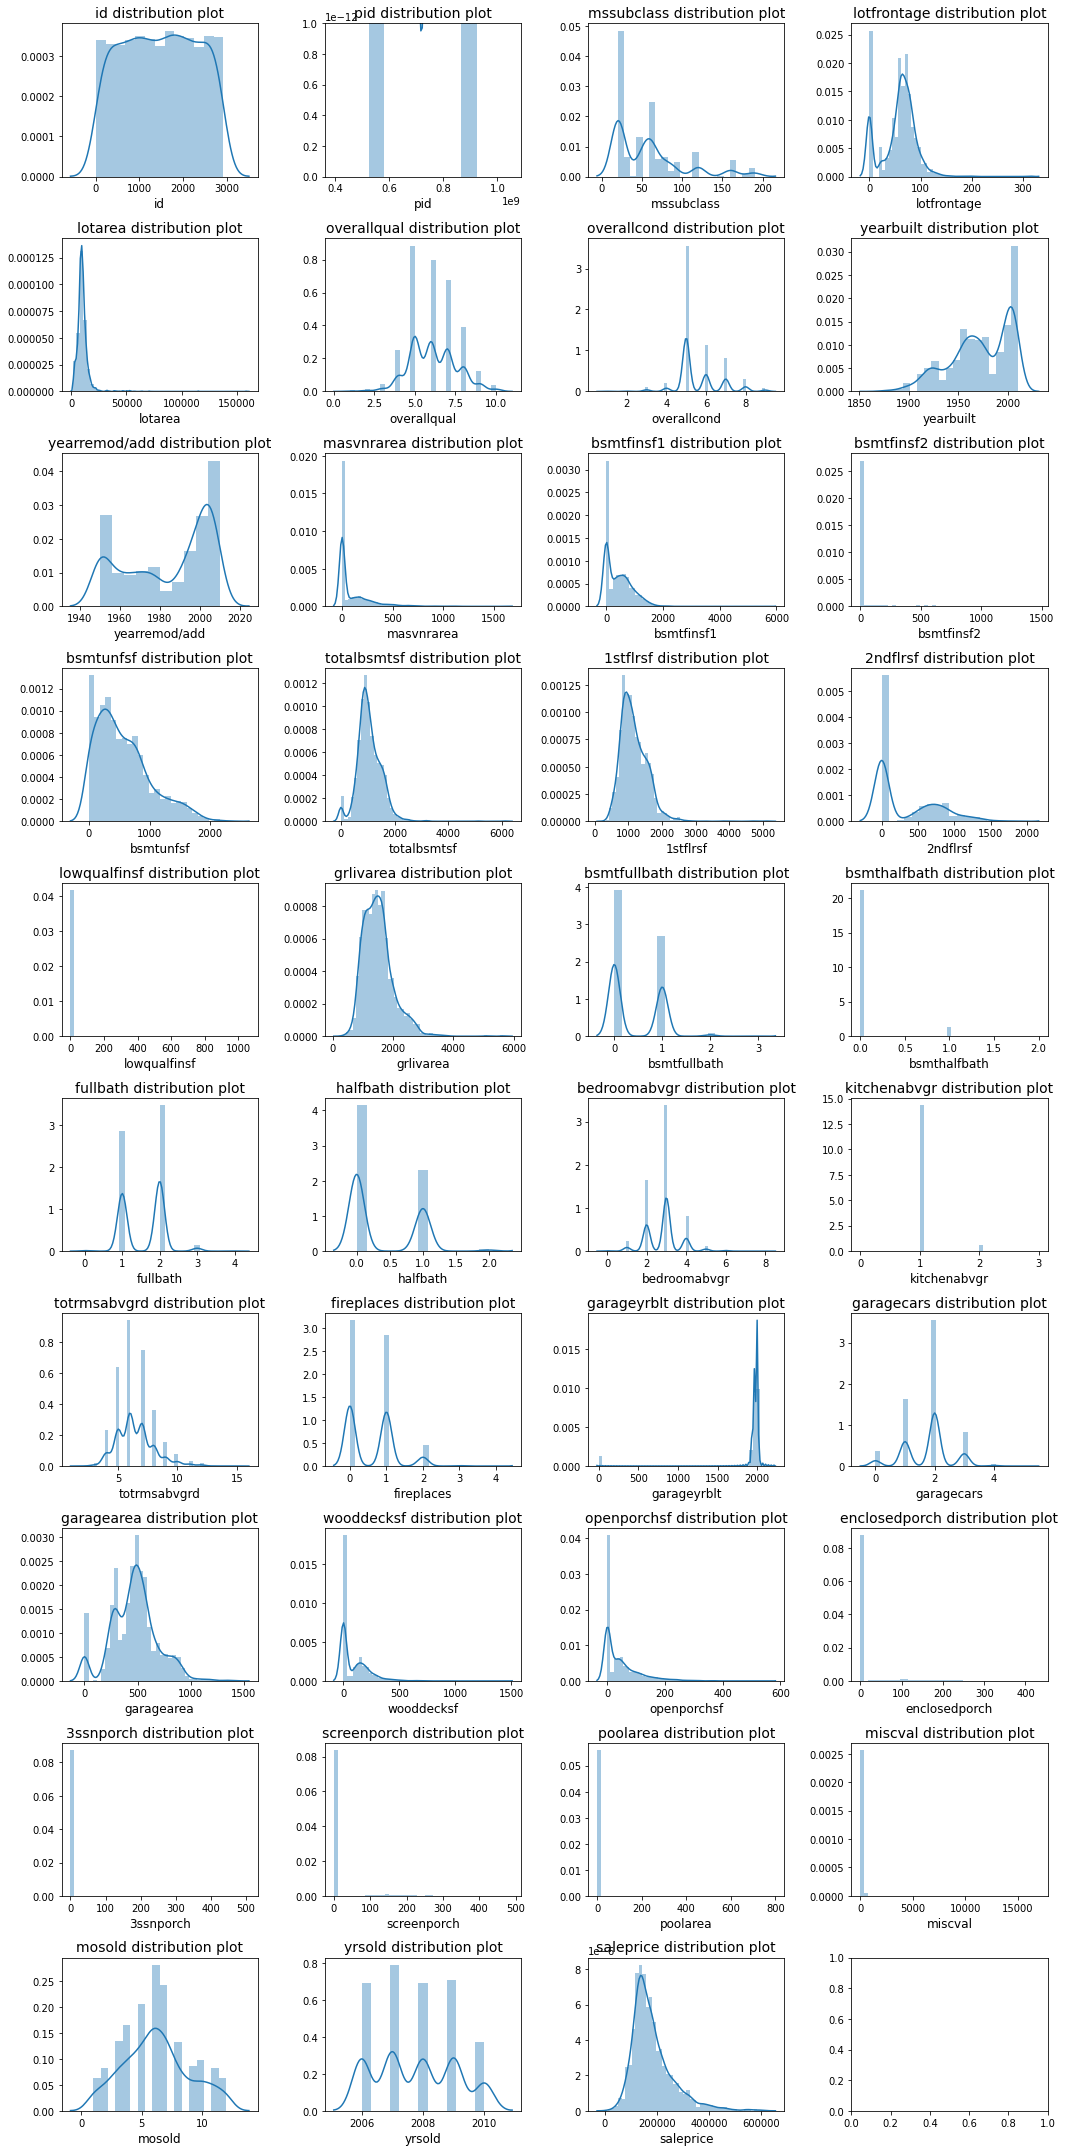

In [16]:
def dist_plot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.distplot(dataframe[column], ax = ax[i])        
        ax[i].set_title(f'{column} distribution plot',fontsize=14)  
        ax[i].set_xlabel(column, fontsize=12)
    plt.tight_layout()
    
dist_plot(train, train_num)

### Dealing with features with too many 0 or 'None' values 
First, I will find the columns which have too many 0 or None values 

- High % of 0: 
    - masvnrarea(60.36%), bsmtfinsf2(87.95%), 2ndflrsf(58.06%), lowqualfinsf(98.39%),  bsmtfullbath(58.60%), bsmthalfbath(93.85%), halfbath(63.77%), wooddecksf(52.41%), openporchsf(44.46%), enclosedporch(84.05%), 3ssnporch(98.73%), screenporch(91.17%), poolarea(99.56%), poolqc(99.56%), miscval(96.83), fireplaces(48.75%)

- High % of None: 
    - alley(93.17%), masvnrtype(60.45%), fireplacequ(48.75%), fence(80.49%), miscfeature(98.83%)

Then I will check their correlation with saleprice. If correlation is low, will drop as they have too many null values and have little impact on sale price

In [17]:
for col in train.columns:
        print (col)
        if train[col].dtype == np.object:
            print ('% None: ', (len(train[train[col] == 'None'])/2051)*100)
        else:
            print ('% zeros: ', (len(train[train[col] == 0])/2051)*100)
        print ('\n')

id
% zeros:  0.0


pid
% zeros:  0.0


mssubclass
% zeros:  0.0


mszoning
% None:  0.0


lotfrontage
% zeros:  16.089712335446123


lotarea
% zeros:  0.0


street
% None:  0.0


alley
% None:  93.1740614334471


lotshape
% None:  0.0


landcontour
% None:  0.0


utilities
% None:  0.0


lotconfig
% None:  0.0


landslope
% None:  0.0


neighborhood
% None:  0.0


condition1
% None:  0.0


condition2
% None:  0.0


bldgtype
% None:  0.0


housestyle
% None:  0.0


overallqual
% zeros:  0.0


overallcond
% zeros:  0.0


yearbuilt
% zeros:  0.0


yearremod/add
% zeros:  0.0


roofstyle
% None:  0.0


roofmatl
% None:  0.0


exterior1st
% None:  0.0


exterior2nd
% None:  0.0


masvnrtype
% None:  60.45831301803998


masvnrarea
% zeros:  60.36079960994637


exterqual
% None:  0.0


extercond
% None:  0.0


foundation
% None:  0.0


bsmtqual
% None:  2.681618722574354


bsmtcond
% None:  2.681618722574354


bsmtexposure
% None:  2.8278888347147735


bsmtfintype1
% None:  2.681618722574354


### Correlation of numeric features with sale price

Numerical columns with high % of 0s and low correlation with sale price:
- bsmtfinsf2, miscval, lowqualfinsf, bsmthalfbath 

These will be dropped

In [18]:
#dataframe of features with high zero
high_zero = train.filter(['masvnrarea', 'bsmtfinsf2', '2ndflrsf', 'lowqualfinsf', 'bsmtfullbath', 'bsmthalfbath', 
                  'halfbath', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
                'poolqc', 'miscval', 'fireplaces', 'saleprice'])

high_zero.corrwith(train['saleprice']).sort_values(ascending=False)

saleprice        1.000000
masvnrarea       0.503579
fireplaces       0.471093
openporchsf      0.333476
wooddecksf       0.326490
bsmtfullbath     0.283332
halfbath         0.283001
2ndflrsf         0.248452
screenporch      0.134581
3ssnporch        0.048732
poolarea         0.023106
bsmtfinsf2       0.016432
miscval         -0.007375
lowqualfinsf    -0.041594
bsmthalfbath    -0.045290
enclosedporch   -0.135656
dtype: float64

### Correlation between sale price and categorical features

Features with high % of Nones:
- alley, masvnrtype, fireplacequ, fence, miscfeature

Categorical features with low correlation with sales price:
- alley, fence, miscfeature
Categorical features with high correlation with sales price:
- masvnrtype and fireplacequ

Drop alley, fence, miscfeature

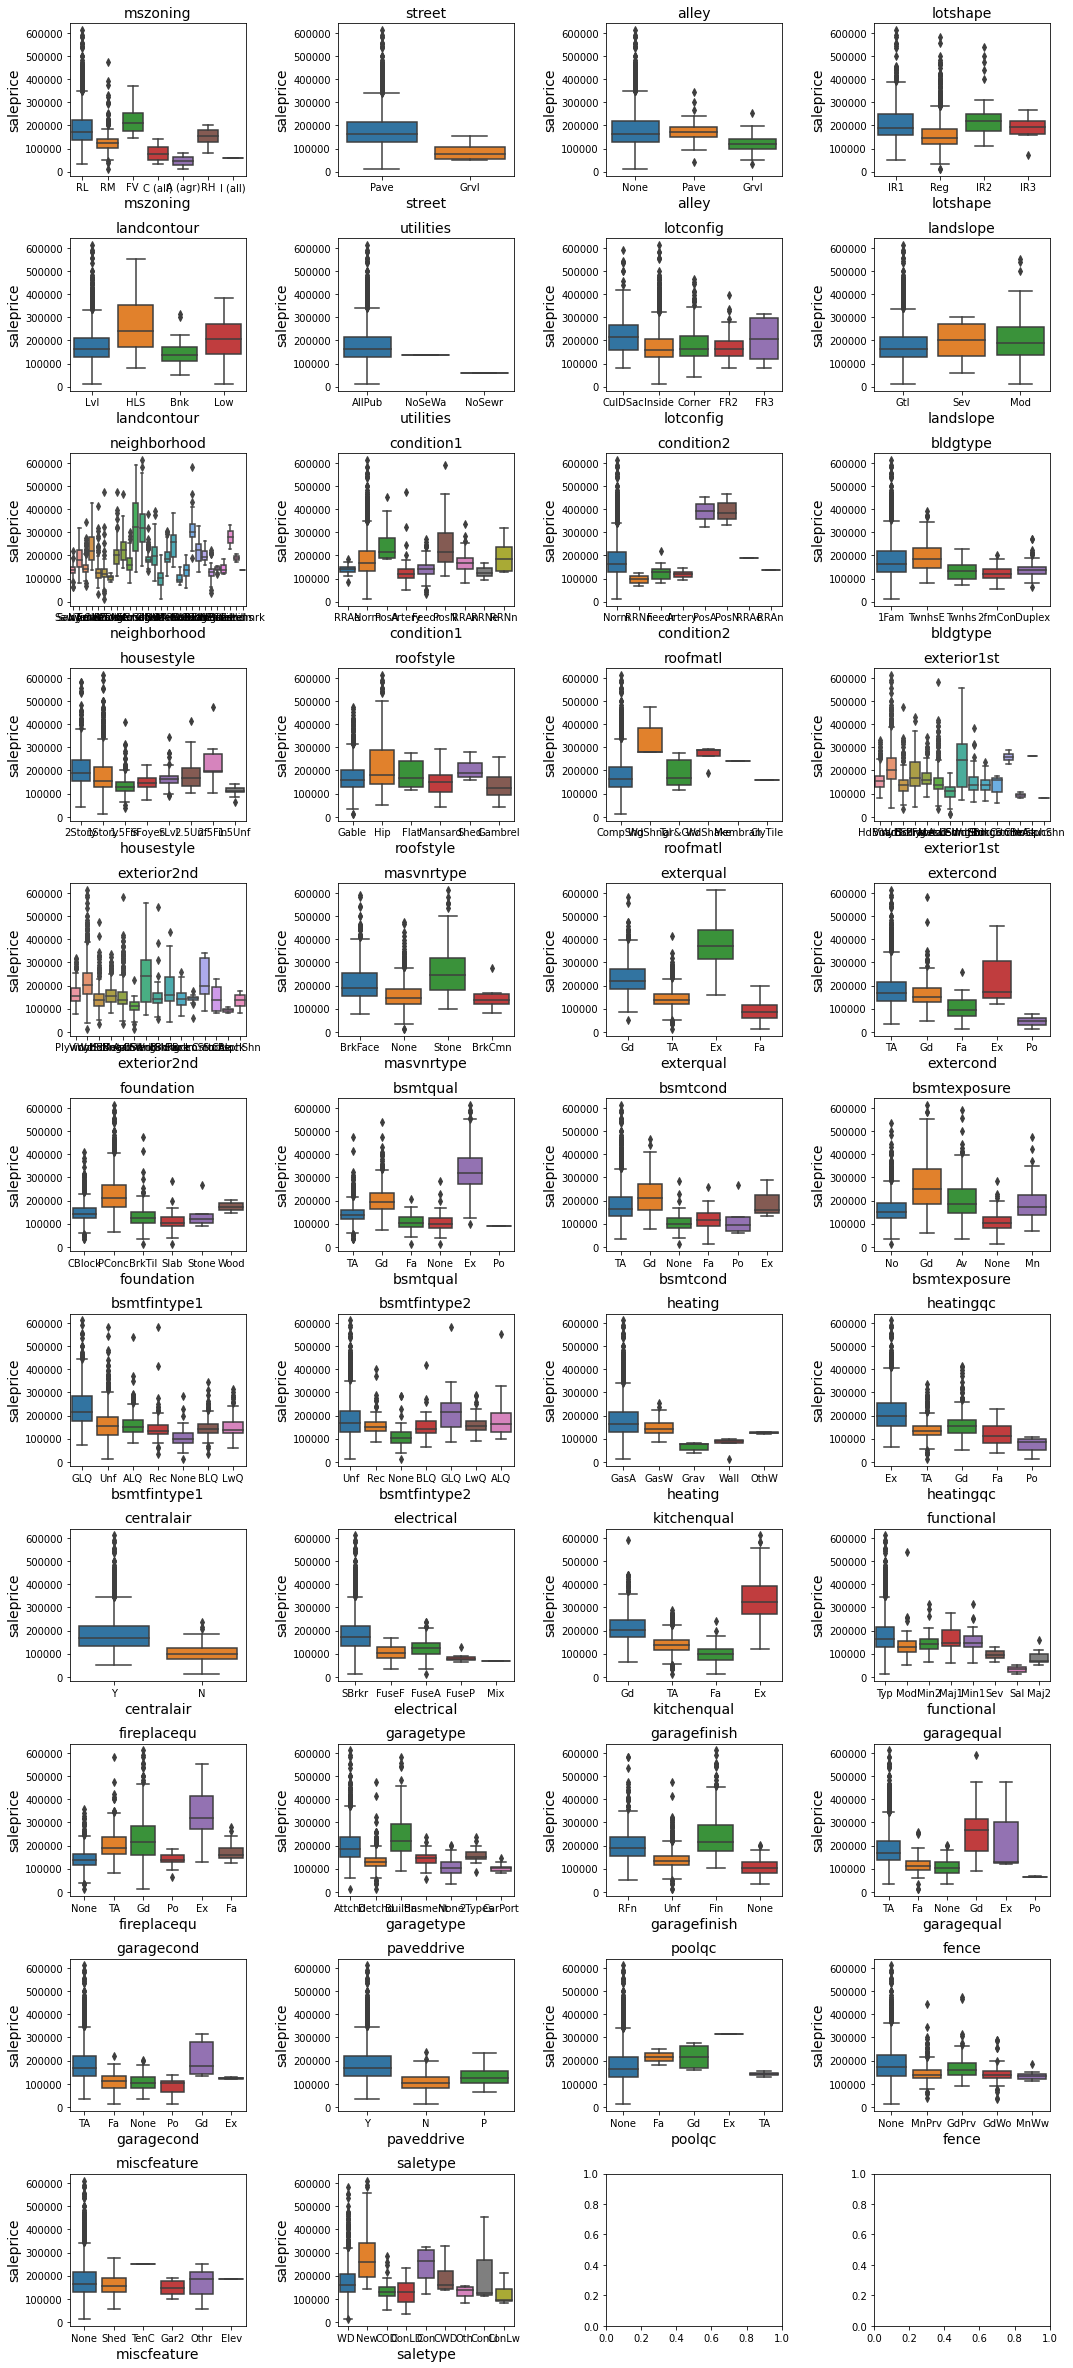

In [19]:
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x = dataframe[column], y = dataframe['saleprice'], ax = ax[i])
        ax[i].set_title(column,fontsize=14)  
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()

subplot_box(train, train_cat)

### Distribution of categorical values 

Finding categorical values with mostly single values. These columns could potentially skew sale price. 

Based on histogram, some categorical columns are mostly made up of a single values are: 
- alley, street, landcontour, utilities, landslope, condition2, roofmatl, bsmtfintype2, heating, centralair, miscfeature, saletype, bsmtcond, extercond, garagequal

Of these, categorical columns also with low correlation to sale price are:
- street, utilities, heating, bsmtfintype2, centralair, miscfeature, saletype, bsmtcond, extercond, garagequal
These will be dropped

Some categorical columns are ordinal, can be converted to numeric type
- exterqual, extercond, bsmtqual, bsmtcond, bsmtexposure, heating qc, kitchenqual, fireplacequal, garagequal, garagecond, poolqc

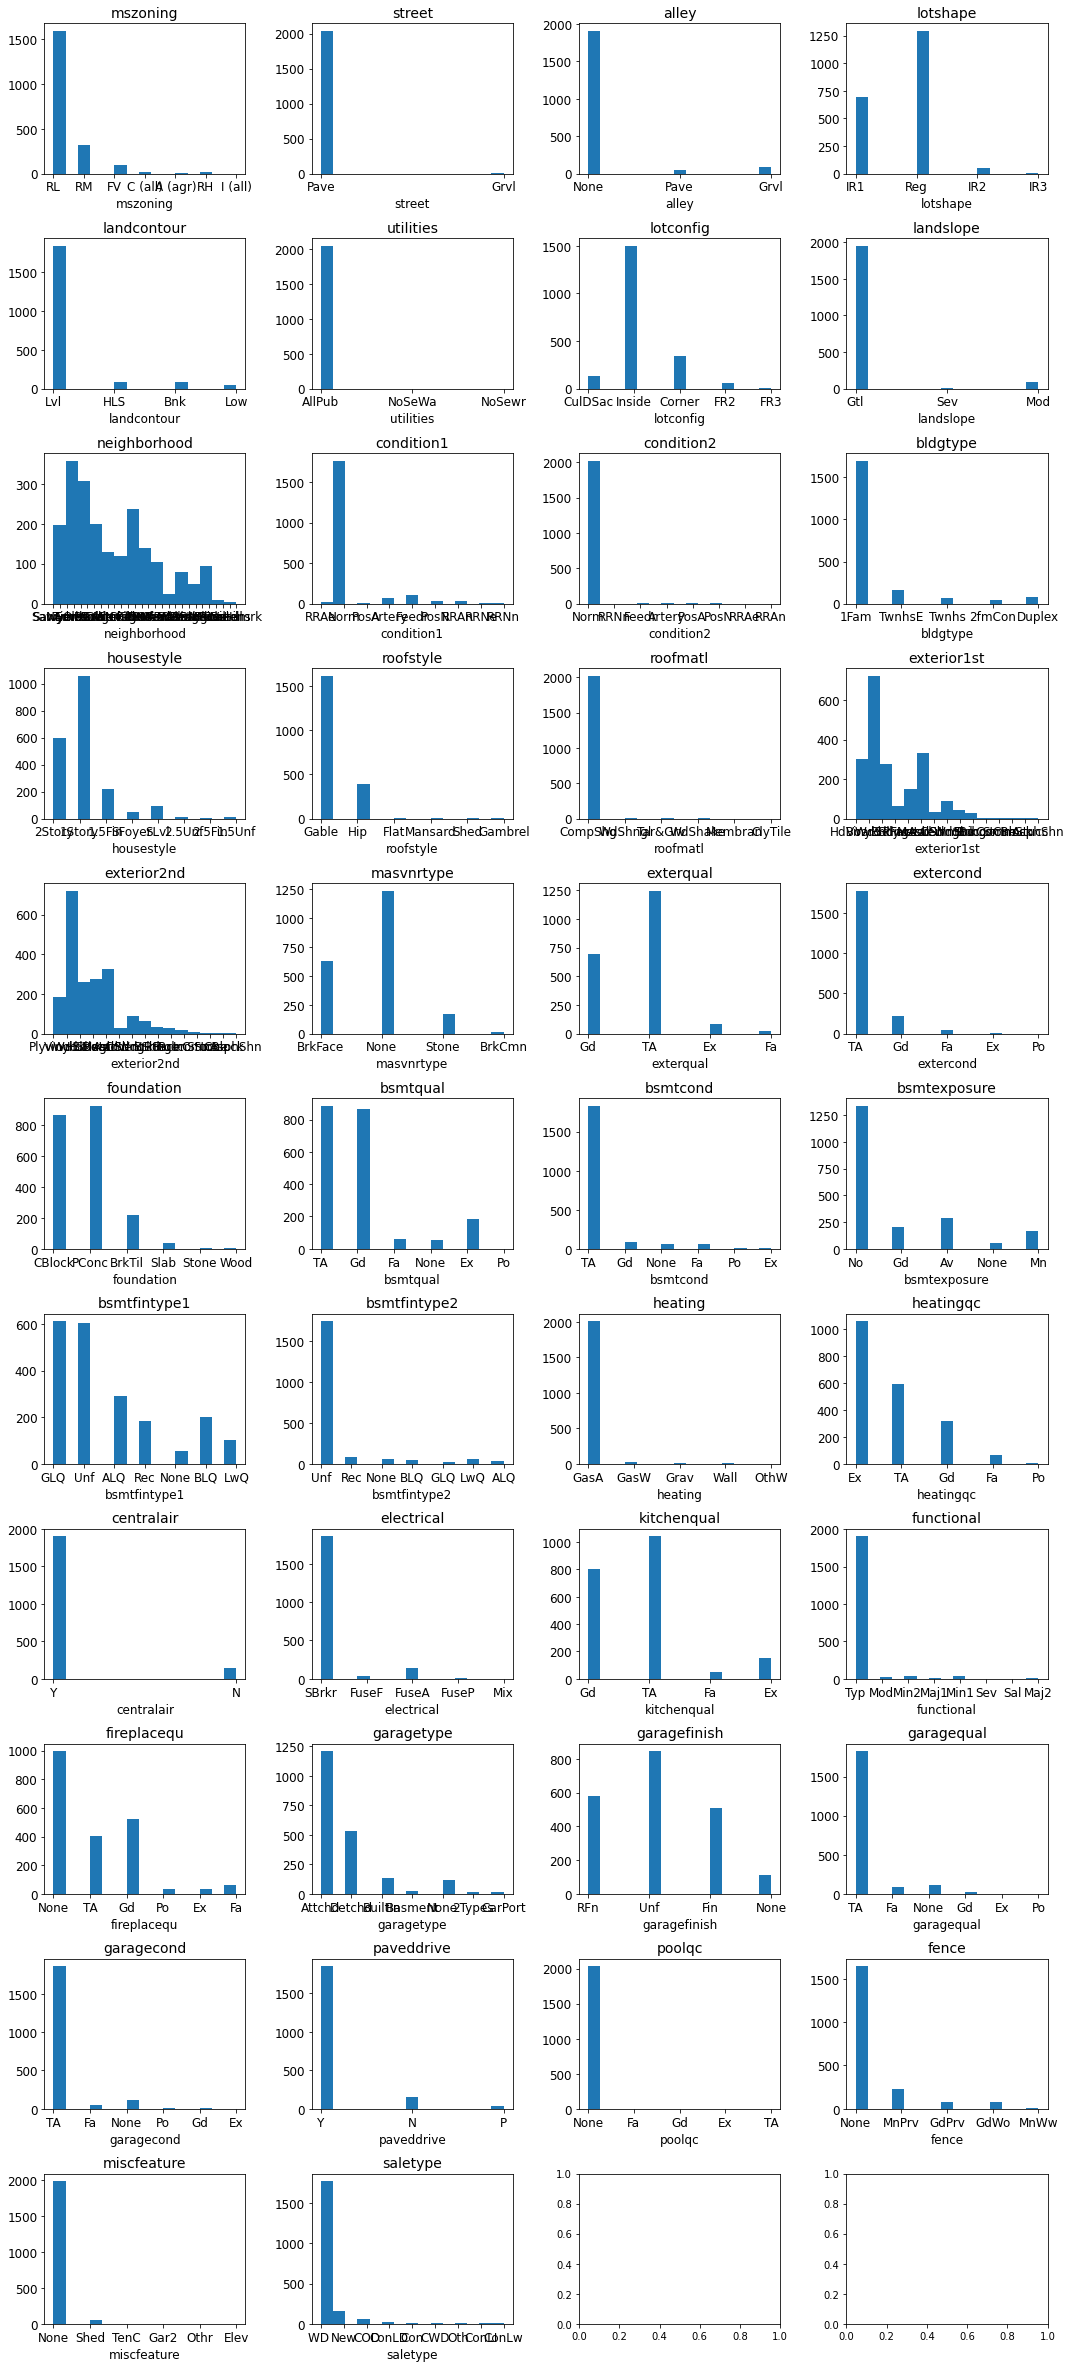

In [20]:
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=15)        
        ax[i].set_title(column, fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=12)
    plt.tight_layout()

subplot_histograms(train, train_cat)

### Correlation between numerical columns and sale price with scatter plots

The columns which have the strongest positive linear relationship with sale price are:
- overallqual, yearbuilt, yearmod, totalbsmtsqft, 1stflrsf, grlivarea, fullbath, totrmsabvgrd, fireplaces, garagecars, garagearea

These features either refer to age of house, quality of house, square footage of house and important features such as full baths and fireplaces. 

There are significant outliers in:
- lotfrontage, lotarea, bsmtfinsf1, bsmtfinsf2, totalbsmtsf, 1stflrsf, grlivarea

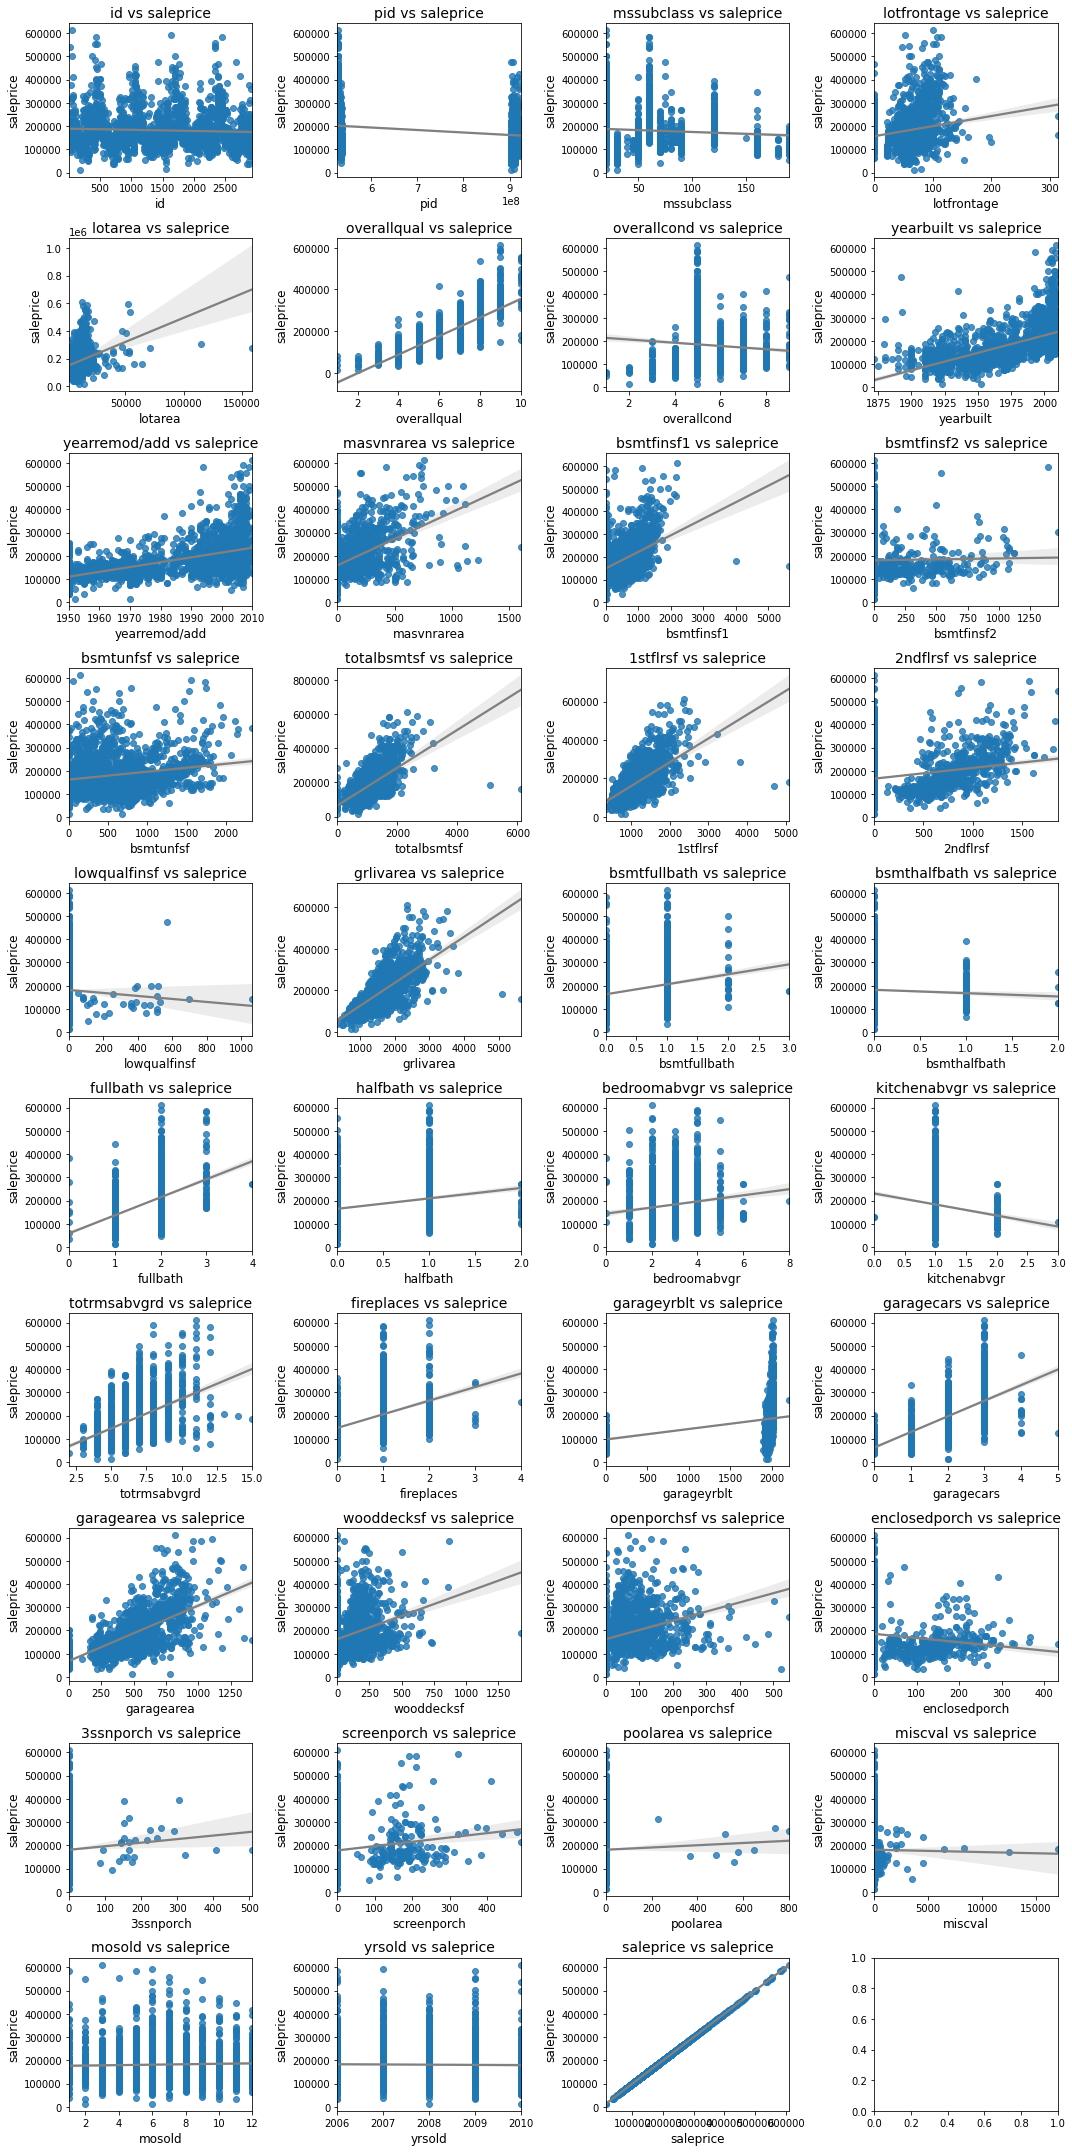

In [21]:
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(x=dataframe[column],y=dataframe['saleprice'], ax=ax[i], line_kws = {'color':'grey'})        
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].set_xlabel(column, fontsize=12)
        ax[i].set_ylabel('saleprice', fontsize=12)
    plt.tight_layout()
    
subplot_scatter(train, train_num)

### Heatmap of Correlation Matrix 

SalePrice strongly correlated (>0.5) with OverallQual(0.8), Total Bsmt SF(0.63), 1st Flr SF(0.62), Gr Liv Area(0.7), Full Bath(0.54), TotRms AbvGrnd(0.5), Garage Cars(0.65), Garage Area(0.65)

YrSold strongly negatively correlated with ID (ID organised from oldest to newest sale)

1st Flr SF strongly positively correlated (0.81) with Total Bsmt SF (size of basement positively correlated to size of first floor) - indicates collinearity 

TotRms AbvGrnd strongly positively correlated (0.81) with Gr Liv Area (total no of rooms positively correlated with above ground living area)- indicates collinearity 

Garage Area strongly positively correlated (0.89) with Garage Cars (garage sq ft positively correlated with car capacity)- indicates collinearity 

Features with strong collinearity may need to be removed.

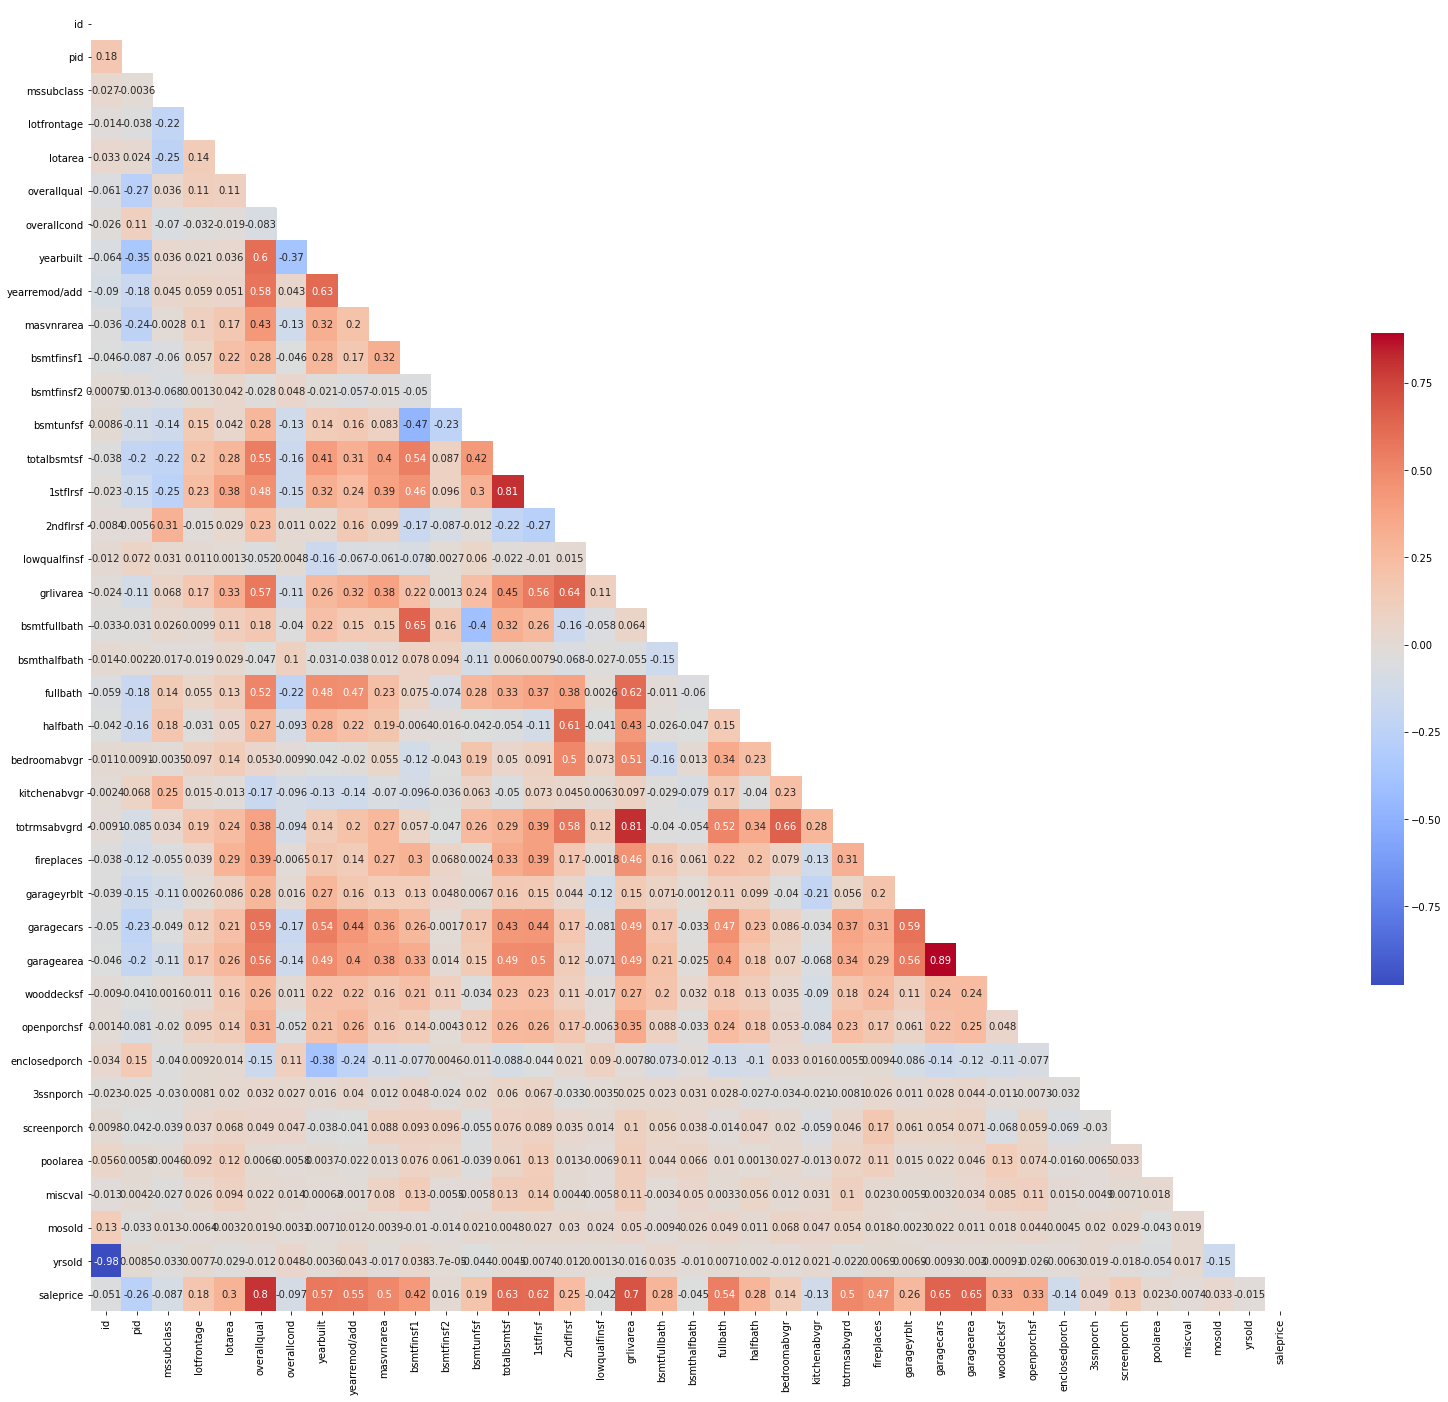

In [22]:
plt.figure(figsize = (27,24))

mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))

sns.heatmap(train.corr(), mask=mask, annot=True, cmap="coolwarm", cbar_kws={"shrink": .5})

---
### Pairplots of features most strongly correlated with SalePrice

As observed earlier, the features most strongly correlated with saleprice (>0.5) are:
- overallqual, totalbsmtsf, 1stflrsf, grlivarea, fullbath, totrmsabvgrnd, garagecars, garagearea

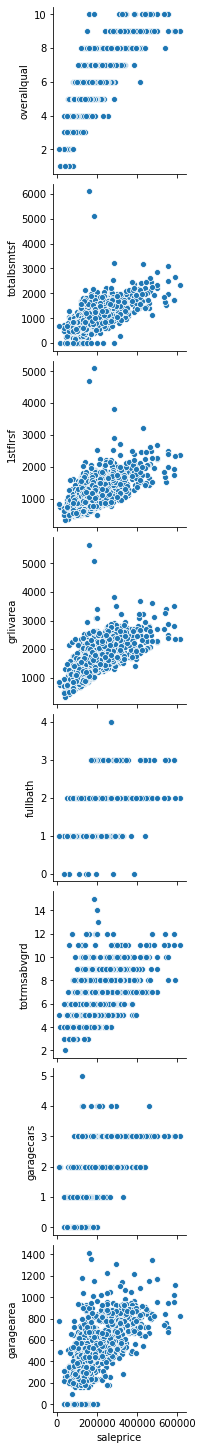

In [23]:
sns.pairplot(train, y_vars=['overallqual', 'totalbsmtsf', '1stflrsf', 'grlivarea', 'fullbath', 'totrmsabvgrd', 
                            'garagecars', 'garagearea'], 
             x_vars=['saleprice'])

---
## Proposed feature engineering
#### Based on the charts above, some features warrant a more in-depth look to determine the appropriate action for the feature

Thus far, I have identified these possible modifications 

Drop following columns due to low correlation with sale price:
- bsmtfinsf2, miscval, lowqualfinsf, bsmthalfbath (numeric columns with high % of 0)
- alley, fence, miscfeature (categorical columns with high % of 'None')
- street, utilities, heating, bsmtfintype2, centralair, saletype, bsmtcond, extercond, garagequal (categorical columns with high % of a single value)

Drop PID column

Drop columns with strong collinearity (seen from heatmap).
- totalbsmtsf
- totrmsabvgrd
- garagecars

Drop outliers in:
- lotfrontage, lotarea, bsmtfinsf1, totalbsmtsf, 1stflrsf, grlivarea

Convert ordinal categorical columns to numeric 
- exterqual, bsmtqual, bsmtcond, bsmtexposure, heatingqc, kitchenqual, fireplacequ, garagecond, poolqc, lotshape

Convert mssubclass to object type, not string

### Grouping of porch and pool columns into single column indicating presence of features

Porch columns (3ssnporch, enclosedporch, openporch, screenporch) have many None or 0 values. However, they have relatively high correlation with sale price, so they should not be dropped. 
- Porch columns will be combined into a single column indicating the presence of porch. 
- New column 'porch'
    - For houses with areas > 0 for any of the porch columns will be assigned value = 1 in new porch colummn. - 
    - Otherwise, value = 0 
- Drop 3ssnporch, enclosedporch, openporch, screenporch

Pool columns (poolarea, poolqc) have many None or 0 values. However, they have relatively high correlation with sale price, so they should not be dropped. 
- Pool columns will be combined into a single column indicating the presence of pool. 
- New column 'pool'
    - For houses with poolqc > 0 will be assigned value = 1 in new pool colummn. 
    - Otherwise, value = 0 
- Drop poolarea and poolqc

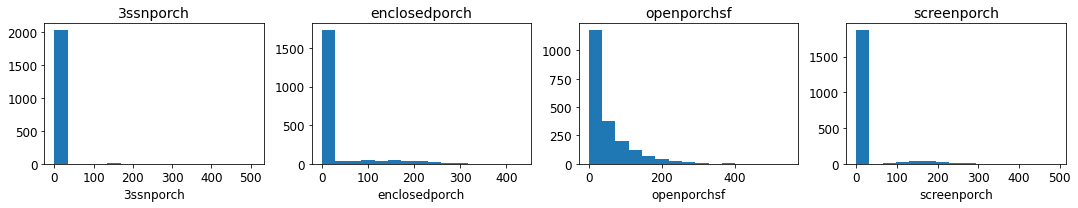

In [24]:
porch = ['3ssnporch','enclosedporch','openporchsf','screenporch']
subplot_histograms(train, porch)

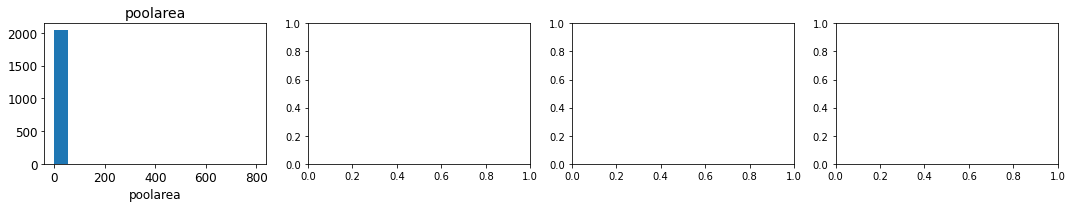

In [25]:
pool = ['poolarea']
subplot_histograms(train, pool)

### New columns to indicate presence of garage, fireplace, basement, masonry veneer

These features seem to have strong positive correlation with sale price. Thus, columns to indicate their presence in the house will be added
- New columns: 'garage', 'fireplace', 'basement', 'masvnr'
- Present (value = 1)
- Not present (value = 0)

### Modifications to 'landslope' column

Group 'severe' with 'moderate' and change to 'sloped'

In [26]:
train.landslope.value_counts()

Gtl    1953
Mod      88
Sev      10
Name: landslope, dtype: int64

### New 'age sold' column

New column to indicate age of house when sold 
- 'agesold' 
    - values = yearbuilt - yrsold

### New 'remodelled' column 

New column 'remodelled' to indicate whether remodelling has been done 
- If house built same year as remodelled year, then indicate no remodel (value = 0)
- If house built different year as remodelled year, then indicate remodel done (value = 1)

Drop yearremod/add column

### Drop 'garageyrblt'
Most garages built same year as house (yearbuilt) - high collinearity 
- 1564 of 2051 garages in train dataset built in same year as house

In [27]:
len(train[train['garageyrblt']==train['yearbuilt']])

1564

### Dealing with 'grlivarea', '1stflrsf', '2ndflrsf'

Many of the values are the same 
- grlivarea = total sq ft of all floors in house
    - grlivarea and 1stflrsf will be same if house only has 1 floor
    - 2018 of 2051 houses have grlivarea = 1stflrsf + 2ndflrsf

Drop 1stflrsf column 

2ndflrsf will be converted from "area" column to column indicating presence
- New '2ndflr' column
    - Presence (value = 1)
    - No presence (value = 0)
- Drop '2ndflrsf'

### New 'big house' column

Since sq ft is a significant indicator of sale price, new 'bighouse' column to indicate houses with grlivarea which is more than value of 1stflrsf and 2ndflrsf. i.e, there are more than 2 floors in the house
- if grlivarea = 1stflrsf + 2ndflrsf
    - bighouse = 0
- if grlivarea > 1stflrsf + 2ndflrsf
    - bighouse = 1

## Conclusion

The data cleaning and EDA process revealed several issues with the train dataset. I have highlighted the changes I would like to make to the data, as well as preliminary feature engineering for several features. The changes will be made to both train.csv and test.csv in the next notebook (Preprocessing and Feature Engineering)